In [ ]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile
import warnings
import numpy as np
import tensorflow as tf
#LibROSA and SciPy py libs for processing audio.
warnings.filterwarnings("ignore")

In [ ]:
#uploaded folder through zip and extracted it.
# from zipfile import ZipFile
# file_name = "/content/trainf.zip"

# with ZipFile(file_name, 'r') as zip:
#   zip.extractall()
#   print('Done')


In [ ]:
!wget http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz

--2020-06-14 08:40:31--  http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.76.128, 2a00:1450:400c:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.76.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1489096277 (1.4G) [application/gzip]
Saving to: ‘speech_commands_v0.01.tar.gz’

speech_commands_v0. 100%[===================>]   1.39G   249MB/s    in 6.2s    

2020-06-14 08:40:37 (228 MB/s) - ‘speech_commands_v0.01.tar.gz’ saved [1489096277/1489096277]



In [ ]:
#uploaded folder through zip and extracted it.
# from zipfile import ZipFile
# file_name = "/content/trainf.zip"

# with ZipFile(file_name, 'r') as zip:
#   zip.extractall()
#   print('Done')
#unzip file
import os
os.mkdir("/tmp/data/")
!tar -xf speech_commands_v0.01.tar.gz -C /tmp/data/

In [ ]:
os.listdir('/tmp/data/')

['marvin',
 'README.md',
 'sheila',
 'six',
 '_background_noise_',
 'tree',
 'validation_list.txt',
 'off',
 'right',
 'bird',
 'LICENSE',
 'one',
 'testing_list.txt',
 'down',
 'nine',
 'up',
 'wow',
 'three',
 'cat',
 'stop',
 'two',
 'go',
 'yes',
 'seven',
 'four',
 'five',
 'bed',
 'happy',
 'no',
 'zero',
 'left',
 'house',
 'on',
 'dog',
 'eight']

In [ ]:
!rm -rf /tmp/data/stop/ /tmp/data/on/ /tmp/data/off/ /tmp/data/three/ /tmp/data/two/ /tmp/data/four/ /tmp/data/no/ /tmp/data/bird/ /tmp/data/down/ /tmp/data/up /tmp/data/cat/ /tmp/data/bed/ /tmp/data/five/ /tmp/data/marvin/ /tmp/data/six/ /tmp/data/tree/ /tmp/data/seven/ /tmp/data/house/ /tmp/data/eight/ /tmp/data/go /tmp/data/README.md /tmp/data/testing_list.txt /tmp/data/validation_list.txt /tmp/data/LICENSE /tmp/data/_background_noise_/

In [ ]:
os.listdir('/tmp/data/')

['sheila',
 'right',
 'one',
 'nine',
 'wow',
 'yes',
 'happy',
 'zero',
 'left',
 'dog']

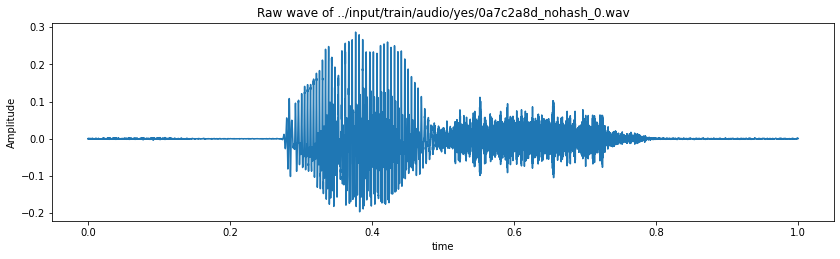

In [ ]:
#obtaining file path and checking out an example
train_audio_path = '/tmp/data/'
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [ ]:
#sampling rate
ipd.Audio(samples, rate=sample_rate)
print(sample_rate)

16000


In [ ]:
#sample rate is 16000hz , resampling to 8000Hz
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

In [ ]:
labels=os.listdir(train_audio_path)

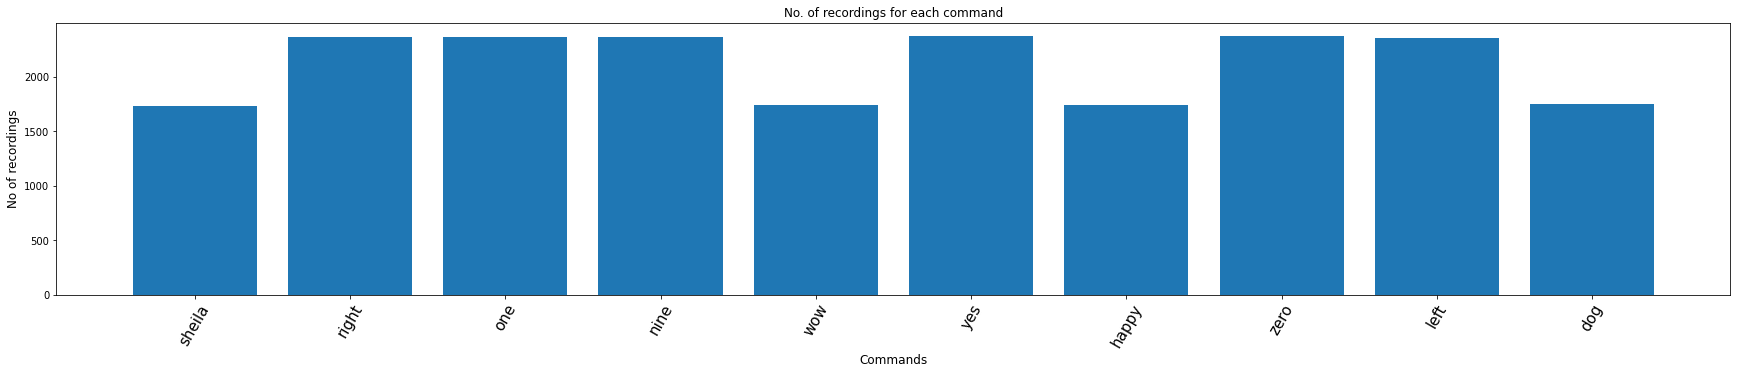

In [ ]:
#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [ ]:
labels=['sheila',
 'right',
 'one',
 'nine',
 'wow',
 'yes',
 'happy',
 'zero',
 'left',
 'dog']
#list of label words

(array([9.0000e+00, 2.8000e+01, 3.1000e+01, 1.1000e+02, 8.8000e+01,
        1.6400e+02, 2.9200e+02, 3.6600e+02, 5.2200e+02, 1.9564e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <a list of 10 Patch objects>)

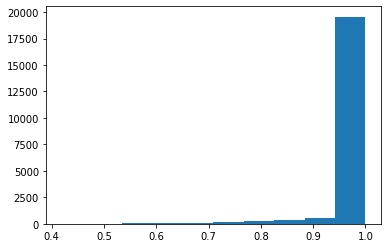

In [ ]:
#distribution of duration of recordings.
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [ ]:
#resampling into labels
train_audio_path = '/tmp/data/'

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

sheila
right
one
nine
wow
yes
happy
zero
left
dog


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [ ]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

Using TensorFlow backend.


In [ ]:
#conversion to one hot veecs.
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [ ]:
#train 80% and validate rest
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [ ]:
#used conv1d layers since it has convolution only in one direction.
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2662, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2662, 8)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 884, 16)           0   

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Train on 15324 samples, validate on 3832 samples
Epoch 1/100
15324/15324 [==============================] - 17s 1ms/step - loss: 2.0885 - accuracy: 0.2210 - val_loss: 1.5629 - val_accuracy: 0.4110
Epoch 2/100
15324/15324 [==============================] - 10s 659us/step - loss: 1.3947 - accuracy: 0.4833 - val_loss: 1.1268 - val_accuracy: 0.5762
Epoch 3/100
15324/15324 [==============================] - 10s 659us/step - loss: 1.1733 - accuracy: 0.5588 - val_loss: 1.0143 - val_accuracy: 0.6026
Epoch 4/100
15324/15324 [==============================] - 10s 658us/step - loss: 1.0159 - accuracy: 0.6246 - val_loss: 0.8690 - val_accuracy: 0.6741
Epoch 5/100
15324/15324 [==============================] - 10s 657us/step - loss: 0.8667 - accuracy: 0.6868 - val_loss: 0.7596 - val_accuracy: 0.7294
Epoch 6/100
15324/15324 [==============================] - 10s 661us/step - loss: 0.7448 - accuracy: 0.7339 - val_loss: 0.6961 - val_accuracy: 0.7630
Epoch 7/100
15324/15324 [============================

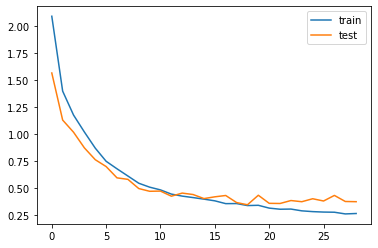

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
#function to predict new audio
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [ ]:
#making predictions on validtion data
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

Audio: one


In [ ]:
print("Text:",predict(samples))

Text: one


In [ ]:
#doesnot work., coz zip did not accomadate all (first attempt zip scattered all files in one common folder)
# used !wget unzip works.